# Titanic Survival Prediction
Thomas De Sa
\
\
09.24.24


#### Setup

In [1]:
#Importing all necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

#### Importing the data

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data cleaning

In [3]:
#Drop Name and Ticket Column, too many unique values for both
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)

In [4]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Replace male with 0 and female with 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,71.2833,C85,C
2,3,1,3,1,26.0,0,0,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,53.1000,C123,S
4,5,0,3,0,35.0,0,0,8.0500,NaN,S


In [6]:
#Too many Nan values to be used
df.drop('Cabin', axis=1, inplace=True)

In [7]:
#Replace Nan age with mean age
mean_age = np.round(df[['Age']].mean(), 0)
df[['Age']] = df[['Age']].replace(np.nan, mean_age)

In [8]:
#Replace NaN embarked port with most common value
df.replace({"Embarked": {np.nan: df['Embarked'].value_counts().idxmax()}}, inplace=True)

In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [10]:
df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [11]:
#Replacing embarked port string with integers
df['Embarked'] = df['Embarked'].map({'Q': 0, 'C': 1, 'S':2})

In [12]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


#### Exploratory Data Analysis

In [13]:
df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex            0.543351
Age           -0.070657
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked      -0.106811
Name: Survived, dtype: float64

The features that are most strongly correlated to survival are: **Pclass, Sex, Fare, Embarked**

#### Predicting Survival Using Linear Regression

In [14]:
#Split our data into training and testing
X = df[['Pclass', 'Sex', 'Fare', 'Embarked']]
Y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 1)

In [15]:
scores = []
degrees = [1,2,3,4,5]

lr = LinearRegression()

for deg in degrees:
    pr = PolynomialFeatures(degree=deg)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)

    lr.fit(x_train_pr, y_train)

    yhat = np.rint(lr.predict(x_test_pr))

    scores.append(r2_score(y_test, yhat))

scores

[0.03842592592592586,
 0.06944444444444431,
 0.06944444444444431,
 0.13148148148148142,
 0.13148148148148142]

Based on the R^2 values, the reggression model does not seem like a good choice for this problem.

#### Random Forest Model

In [16]:
arr = np.arange(1,25)
scores = []

for n in arr: 
    forest_model = RandomForestClassifier(n_estimators=100, max_depth=n, random_state=1)
    forest_model.fit(x_train, y_train)

    scores.append(forest_model.score(x_test, y_test))

Text(0, 0.5, 'R^2 value')

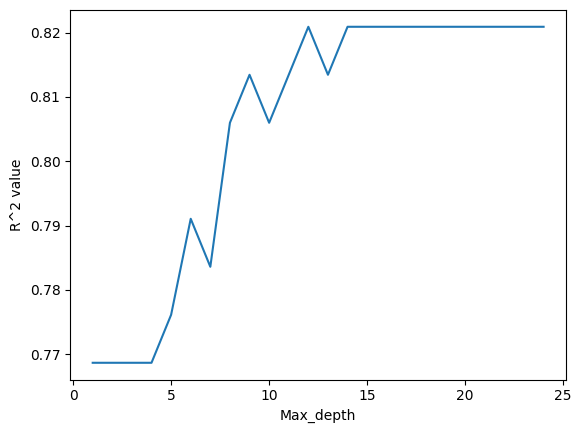

In [17]:
plt.plot(arr, scores)
plt.xlabel("Max_depth")
plt.ylabel("R^2 value")


In [18]:
model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=1)
model.fit(X, Y)
model.score(X, Y)

0.9090909090909091

#### Clean the test.csv data

In [19]:
df_testing = pd.read_csv("test.csv")
df_testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
df_testing['Sex'] = df_testing['Sex'].map({'male': 0, 'female': 1})


In [21]:
df_testing.replace({"Embarked": {np.nan: df_testing['Embarked'].value_counts().idxmax()}}, inplace=True)

In [22]:
df_testing['Embarked'] = df_testing['Embarked'].map({'Q': 0, 'C': 1, 'S':2})

In [23]:
X_submit = df_testing[['Pclass', 'Sex', 'Fare', 'Embarked']]
passengerIDS = df_testing["PassengerId"]

yhat = model.predict(X_submit)

df_submit = pd.DataFrame(columns=['PassengerId', 'Survived'])

df_submit['PassengerId'] = passengerIDS
df_submit['Survived'] = yhat


In [24]:
df_submit.to_csv('submission.csv', index=False)